In [1]:
# Common imports
import numpy as np
import os

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
tf.__version__

'2.2.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
y_train_full.shape

(60000,)

In [12]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_train.shape

(55000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

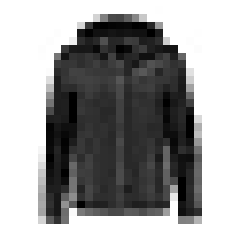

In [19]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

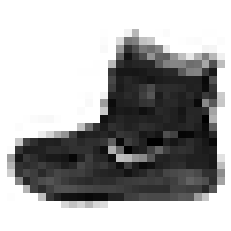

In [20]:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.show()

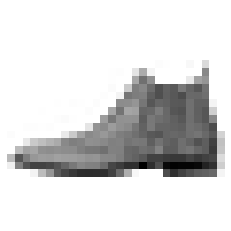

In [21]:
plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

In [22]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [23]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [24]:
class_names[y_train[0]]

'Coat'

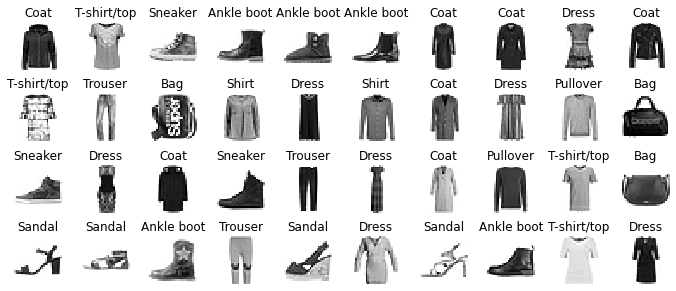

In [25]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
keras.backend.clear_session()
np.random.seed(42)#?

In [32]:
model.layers

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [34]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [35]:
model.get_layer(hidden1.name) is hidden1

True

In [36]:
weights, biases = hidden1.get_weights()

In [37]:
weights

array([[ 0.0207019 , -0.014833  , -0.04295301, ...,  0.07030423,
        -0.04636375,  0.00452143],
       [-0.03988241, -0.06824109,  0.05288579, ...,  0.04319288,
        -0.07085421, -0.02587055],
       [ 0.00819828,  0.02735161, -0.00683741, ..., -0.0519554 ,
        -0.00385976,  0.06844071],
       ...,
       [ 0.0056687 ,  0.00761107, -0.02369985, ..., -0.07300993,
         0.03615881,  0.06835143],
       [-0.07038236, -0.03579174,  0.0201573 , ..., -0.00077373,
         0.01667688,  0.0632703 ],
       [ 0.06843518, -0.03655956, -0.00893234, ...,  0.04843348,
        -0.0374525 , -0.02638953]], dtype=float32)

In [38]:
weights.shape

(784, 300)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
biases.shape

(300,)

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [42]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7049 - accuracy: 0.7661 - val_loss: 0.4998 - val_accuracy: 0.8332
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4849 - accuracy: 0.8309 - val_loss: 0.4524 - val_accuracy: 0.8422
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4417 - accuracy: 0.8446 - val_loss: 0.4381 - val_accuracy: 0.8480
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4151 - accuracy: 0.8539 - val_loss: 0.3988 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3945 - accuracy: 0.8612 - val_loss: 0.3771 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3781 - accuracy: 0.8659 - val_loss: 0.3706 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3647 - accuracy: 0.8699 - val_loss: 0.3647 - val_accuracy:

In [43]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [44]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Plot learning Curves

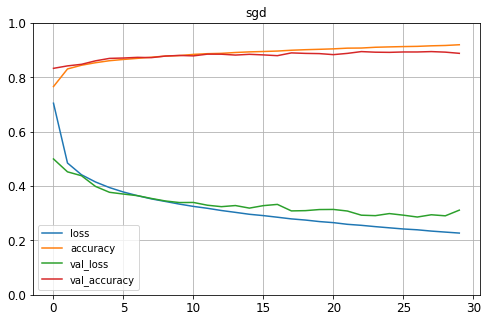

In [46]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5),title=('sgd'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [47]:
osgd=model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8765


In [48]:
osgd

[0.3477756083011627, 0.8765000104904175]

In [49]:
osgd[0]

0.3477756083011627

In [50]:
osgd[1]

0.8765000104904175

In [51]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(5)

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.9530e-02, 0.0000e+00, 1.0870e-02, 3.9000e-04, 9.3918e-01],
       [6.0000e-05, 0.0000e+00, 9.8802e-01, 0.0000e+00, 1.1800e-02,
        0.0000e+00, 1.3000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e-05, 9.9999e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
      dtype=float32)

In [52]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [53]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [54]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

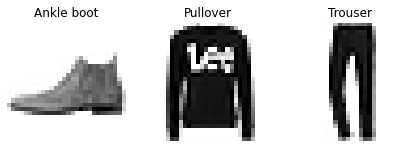

In [55]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# EXERCICE

# 1) Plot Learning curves when using different optimizers


In [57]:
#optimizers:RMSprop
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [58]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4222 - accuracy: 0.8503 - val_loss: 0.4217 - val_accuracy: 0.8504
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3638 - accuracy: 0.8706 - val_loss: 0.3899 - val_accuracy: 0.8710
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3487 - accuracy: 0.8777 - val_loss: 0.3426 - val_accuracy: 0.8910
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3364 - accuracy: 0.8841 - val_loss: 0.4402 - val_accuracy: 0.8716
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3319 - accuracy: 0.8868 - val_loss: 0.4645 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3247 - accuracy: 0.8906 - val_loss: 0.4299 - val_accuracy: 0.8786
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3214 - accuracy: 0.8915 - val_loss: 0.4205 - val_accuracy:

In [59]:
history1.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

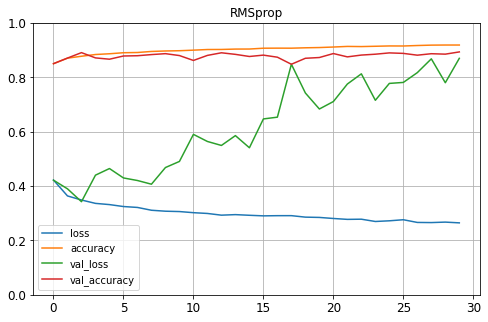

In [60]:
pd.DataFrame(history1.history).plot(figsize=(8, 5),title=('RMSprop'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
RMSprop = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8241 - accuracy: 0.8832


In [62]:
RMSprop

[0.8240898251533508, 0.8831999897956848]

In [63]:
#optimizers:Nadam
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Nadam",
              metrics=["accuracy"])

In [64]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2803 - accuracy: 0.9144 - val_loss: 0.5692 - val_accuracy: 0.8828
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2526 - accuracy: 0.9167 - val_loss: 0.4530 - val_accuracy: 0.8864
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2241 - accuracy: 0.9212 - val_loss: 0.4794 - val_accuracy: 0.8806
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2232 - accuracy: 0.9207 - val_loss: 0.4804 - val_accuracy: 0.8866
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2145 - accuracy: 0.9237 - val_loss: 0.4350 - val_accuracy: 0.8894
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2007 - accuracy: 0.9275 - val_loss: 0.4473 - val_accuracy: 0.8878
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1997 - accuracy: 0.9279 - val_loss: 0.4094 - val_accuracy

In [65]:
history2.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

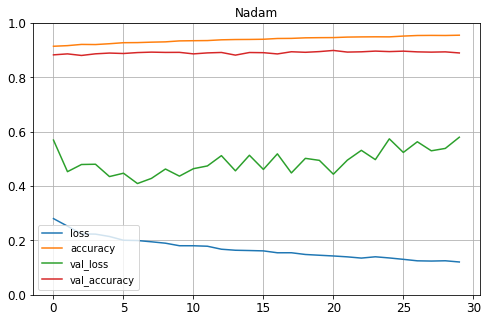

In [66]:
pd.DataFrame(history2.history).plot(figsize=(8, 5),title=('Nadam'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [67]:
Nadam = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6053 - accuracy: 0.8861


In [68]:
Nadam

[0.6053180694580078, 0.8860999941825867]

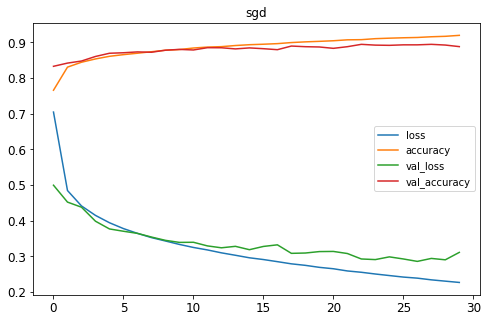

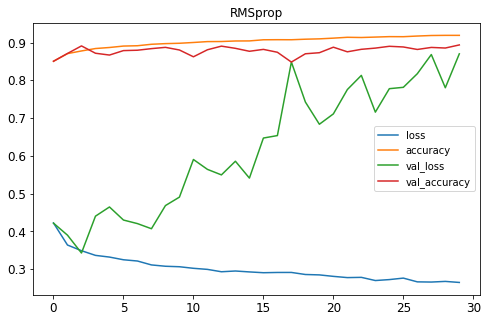

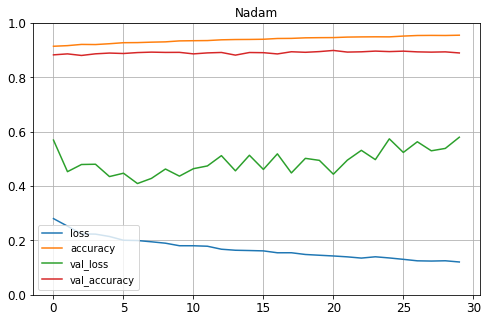

In [69]:
pd.DataFrame(history.history).plot(figsize=(8, 5),title=('sgd'))
pd.DataFrame(history1.history).plot(figsize=(8, 5),title=('RMSprop'))
pd.DataFrame(history2.history).plot(figsize=(8, 5),title=('Nadam'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 2) Plot Learning curves when using different batch size

In [70]:
#batch size = 1
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [71]:
history4 = model.fit(X_train, y_train, batch_size=1, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
55000/55000 [==============================] - 108s 2ms/step - loss: 1.2668 - accuracy: 0.5539 - val_loss: 0.9546 - val_accuracy: 0.6674
Epoch 2/30
55000/55000 [==============================] - 126s 2ms/step - loss: 0.4921 - accuracy: 0.8427 - val_loss: 0.5513 - val_accuracy: 0.8602
Epoch 3/30
55000/55000 [==============================] - 139s 3ms/step - loss: 0.3596 - accuracy: 0.8820 - val_loss: 0.5728 - val_accuracy: 0.8646
Epoch 4/30
55000/55000 [==============================] - 138s 3ms/step - loss: 0.3088 - accuracy: 0.8968 - val_loss: 0.4973 - val_accuracy: 0.8786
Epoch 5/30
55000/55000 [==============================] - 145s 3ms/step - loss: 0.3046 - accuracy: 0.8979 - val_loss: 0.5097 - val_accuracy: 0.8736
Epoch 6/30
55000/55000 [==============================] - 136s 2ms/step - loss: 0.2726 - accuracy: 0.9079 - val_loss: 0.5490 - val_accuracy: 0.8780
Epoch 7/30
55000/55000 [==============================] - 133s 2ms/step - loss: 0.2649 - accuracy: 0.9114 - val_

In [72]:
BS1 = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6282 - accuracy: 0.8806


In [73]:
BS1

[0.6281829476356506, 0.8805999755859375]

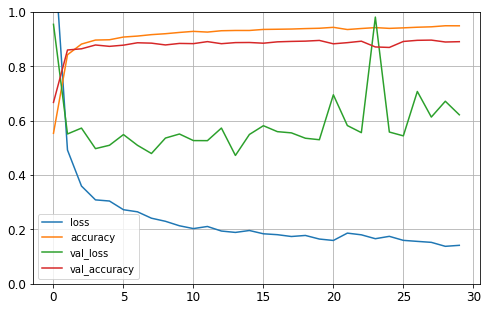

In [74]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [75]:
#batch size = 30
h3 = model.fit(X_train, y_train, batch_size=30, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0940 - accuracy: 0.9652 - val_loss: 0.6213 - val_accuracy: 0.9034
Epoch 2/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0815 - accuracy: 0.9696 - val_loss: 0.6401 - val_accuracy: 0.9038
Epoch 3/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0777 - accuracy: 0.9706 - val_loss: 0.6354 - val_accuracy: 0.9036
Epoch 4/30
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0758 - accuracy: 0.9715 - val_loss: 0.6512 - val_accuracy: 0.9016
Epoch 5/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0744 - accuracy: 0.9715 - val_loss: 0.6590 - val_accuracy: 0.9030
Epoch 6/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0737 - accuracy: 0.9721 - val_loss: 0.6646 - val_accuracy: 0.9018
Epoch 7/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0727 - accuracy: 0.9726 - val_loss: 0.6671 - val_accuracy:

In [76]:
BS30 = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8084 - accuracy: 0.8919


In [77]:
BS30

[0.8083927035331726, 0.8919000029563904]

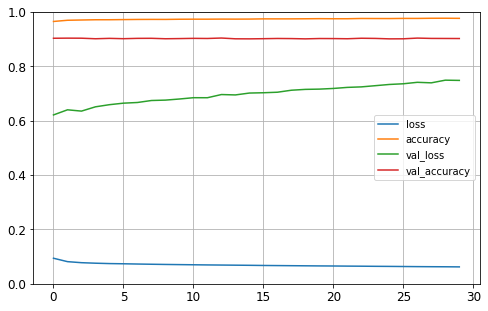

In [78]:
pd.DataFrame(h3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 3) Plot Learning curves when using different number of epochs

In [79]:
#number of epochs=1
h6 = model.fit(X_train, y_train, batch_size=32, epochs=1,
                    validation_data=(X_valid, y_valid))

1719/1719 [==============================] - 5s 3ms/step - loss: 0.0618 - accuracy: 0.9770 - val_loss: 0.7545 - val_accuracy: 0.9026


In [80]:
epochs1 = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8180 - accuracy: 0.8933


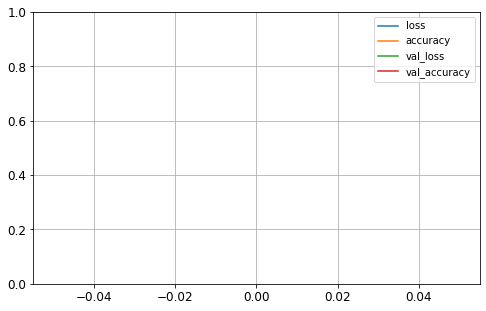

In [81]:
pd.DataFrame(h6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
#number of epochs=10

In [82]:
h7 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0615 - accuracy: 0.9771 - val_loss: 0.7553 - val_accuracy: 0.9014
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0611 - accuracy: 0.9771 - val_loss: 0.7575 - val_accuracy: 0.9036
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0609 - accuracy: 0.9771 - val_loss: 0.7624 - val_accuracy: 0.9032
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0607 - accuracy: 0.9776 - val_loss: 0.7587 - val_accuracy: 0.9046
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9776 - val_loss: 0.7695 - val_accuracy: 0.9024
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0601 - accuracy: 0.9776 - val_loss: 0.7728 - val_accuracy: 0.9034
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0597 - accuracy: 0.9779 - val_loss: 0.7701 - val_accuracy:

In [83]:
epochs10 = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8437 - accuracy: 0.8920


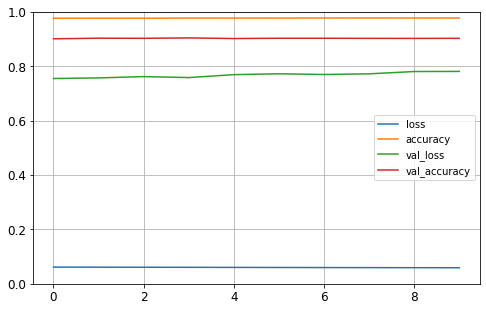

In [84]:
pd.DataFrame(h7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [85]:
#number of epochs=100

In [86]:
h8 = model.fit(X_train, y_train, batch_size=32, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 16s 10ms/step - loss: 0.0587 - accuracy: 0.9786 - val_loss: 0.7814 - val_accuracy: 0.9024
Epoch 2/100
1719/1719 [==============================] - 16s 9ms/step - loss: 0.0582 - accuracy: 0.9784 - val_loss: 0.7839 - val_accuracy: 0.9028
Epoch 3/100
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0582 - accuracy: 0.9787 - val_loss: 0.7895 - val_accuracy: 0.9030
Epoch 4/100
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0578 - accuracy: 0.9787 - val_loss: 0.7899 - val_accuracy: 0.9026
Epoch 5/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0577 - accuracy: 0.9786 - val_loss: 0.7969 - val_accuracy: 0.9024
Epoch 6/100
1719/1719 [==============================] - 18s 11ms/step - loss: 0.0575 - accuracy: 0.9789 - val_loss: 0.7998 - val_accuracy: 0.9010
Epoch 7/100
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0571 - accuracy: 0.9789 - val_loss: 0.8

In [87]:
epochs100 = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.1209 - accuracy: 0.8921


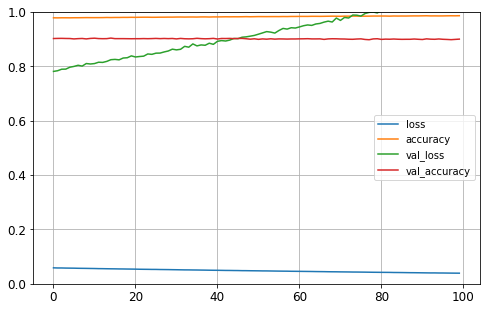

In [88]:
pd.DataFrame(h8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 4) repeat with more layers

In [89]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(250, activation="relu"))
model.add(keras.layers.Dense(180, activation="relu"))
model.add(keras.layers.Dense(70, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [90]:
model.layers

In [91]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [92]:
h9 = model.fit(X_train, y_train, batch_size=1000, epochs=55,
                    validation_data=(X_valid, y_valid))

Epoch 1/55
55/55 [==============================] - 7s 133ms/step - loss: 2.2142 - accuracy: 0.2656 - val_loss: 2.0941 - val_accuracy: 0.4104
Epoch 2/55
55/55 [==============================] - 6s 109ms/step - loss: 1.9584 - accuracy: 0.4616 - val_loss: 1.7814 - val_accuracy: 0.5208
Epoch 3/55
55/55 [==============================] - 6s 110ms/step - loss: 1.5927 - accuracy: 0.5649 - val_loss: 1.3737 - val_accuracy: 0.5906
Epoch 4/55
55/55 [==============================] - 6s 107ms/step - loss: 1.2146 - accuracy: 0.6026 - val_loss: 1.0513 - val_accuracy: 0.6418
Epoch 5/55
55/55 [==============================] - 6s 104ms/step - loss: 0.9787 - accuracy: 0.6669 - val_loss: 0.9422 - val_accuracy: 0.6686
Epoch 6/55
55/55 [==============================] - 6s 108ms/step - loss: 0.8727 - accuracy: 0.6930 - val_loss: 0.8244 - val_accuracy: 0.7112
Epoch 7/55
55/55 [==============================] - 6s 107ms/step - loss: 0.8180 - accuracy: 0.7038 - val_loss: 0.7802 - val_accuracy: 0.7274
Epoch 

In [93]:
ML = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.4456 - accuracy: 0.8447


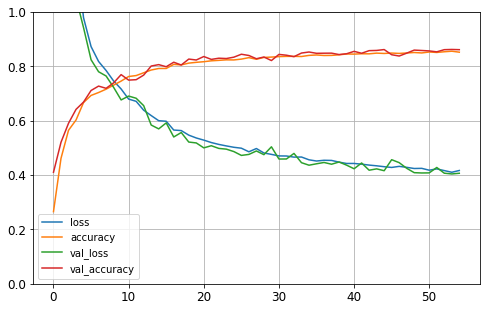

In [94]:
pd.DataFrame(h9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 5) apply on different datasets